# 3.5 군집

- 데이터셋을 클러스터라는 그룹으로 나누는 작업
- 클러스터 안의 데이터 포인트끼리는 매우 비슷, 다른 클러스터의 데이터 포인트와는 분리되도록 나눔
- 새로운 데이터가 어떤 군집에 속할지 할당(또는 예측)

### 3.5.2 병합 군집
- 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그 다음 어떤 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터를 합쳐나감

- ward
    - 기본값인 ward 연결은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합칩니다. 그래서 크기가 비교적 비슷한 클러스터가 만들어집니다.
- average
    - average 연결은 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합칩니다.
- complete
    - complete 연결(최대 연결이라고도 합니다.)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합칩니다.

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

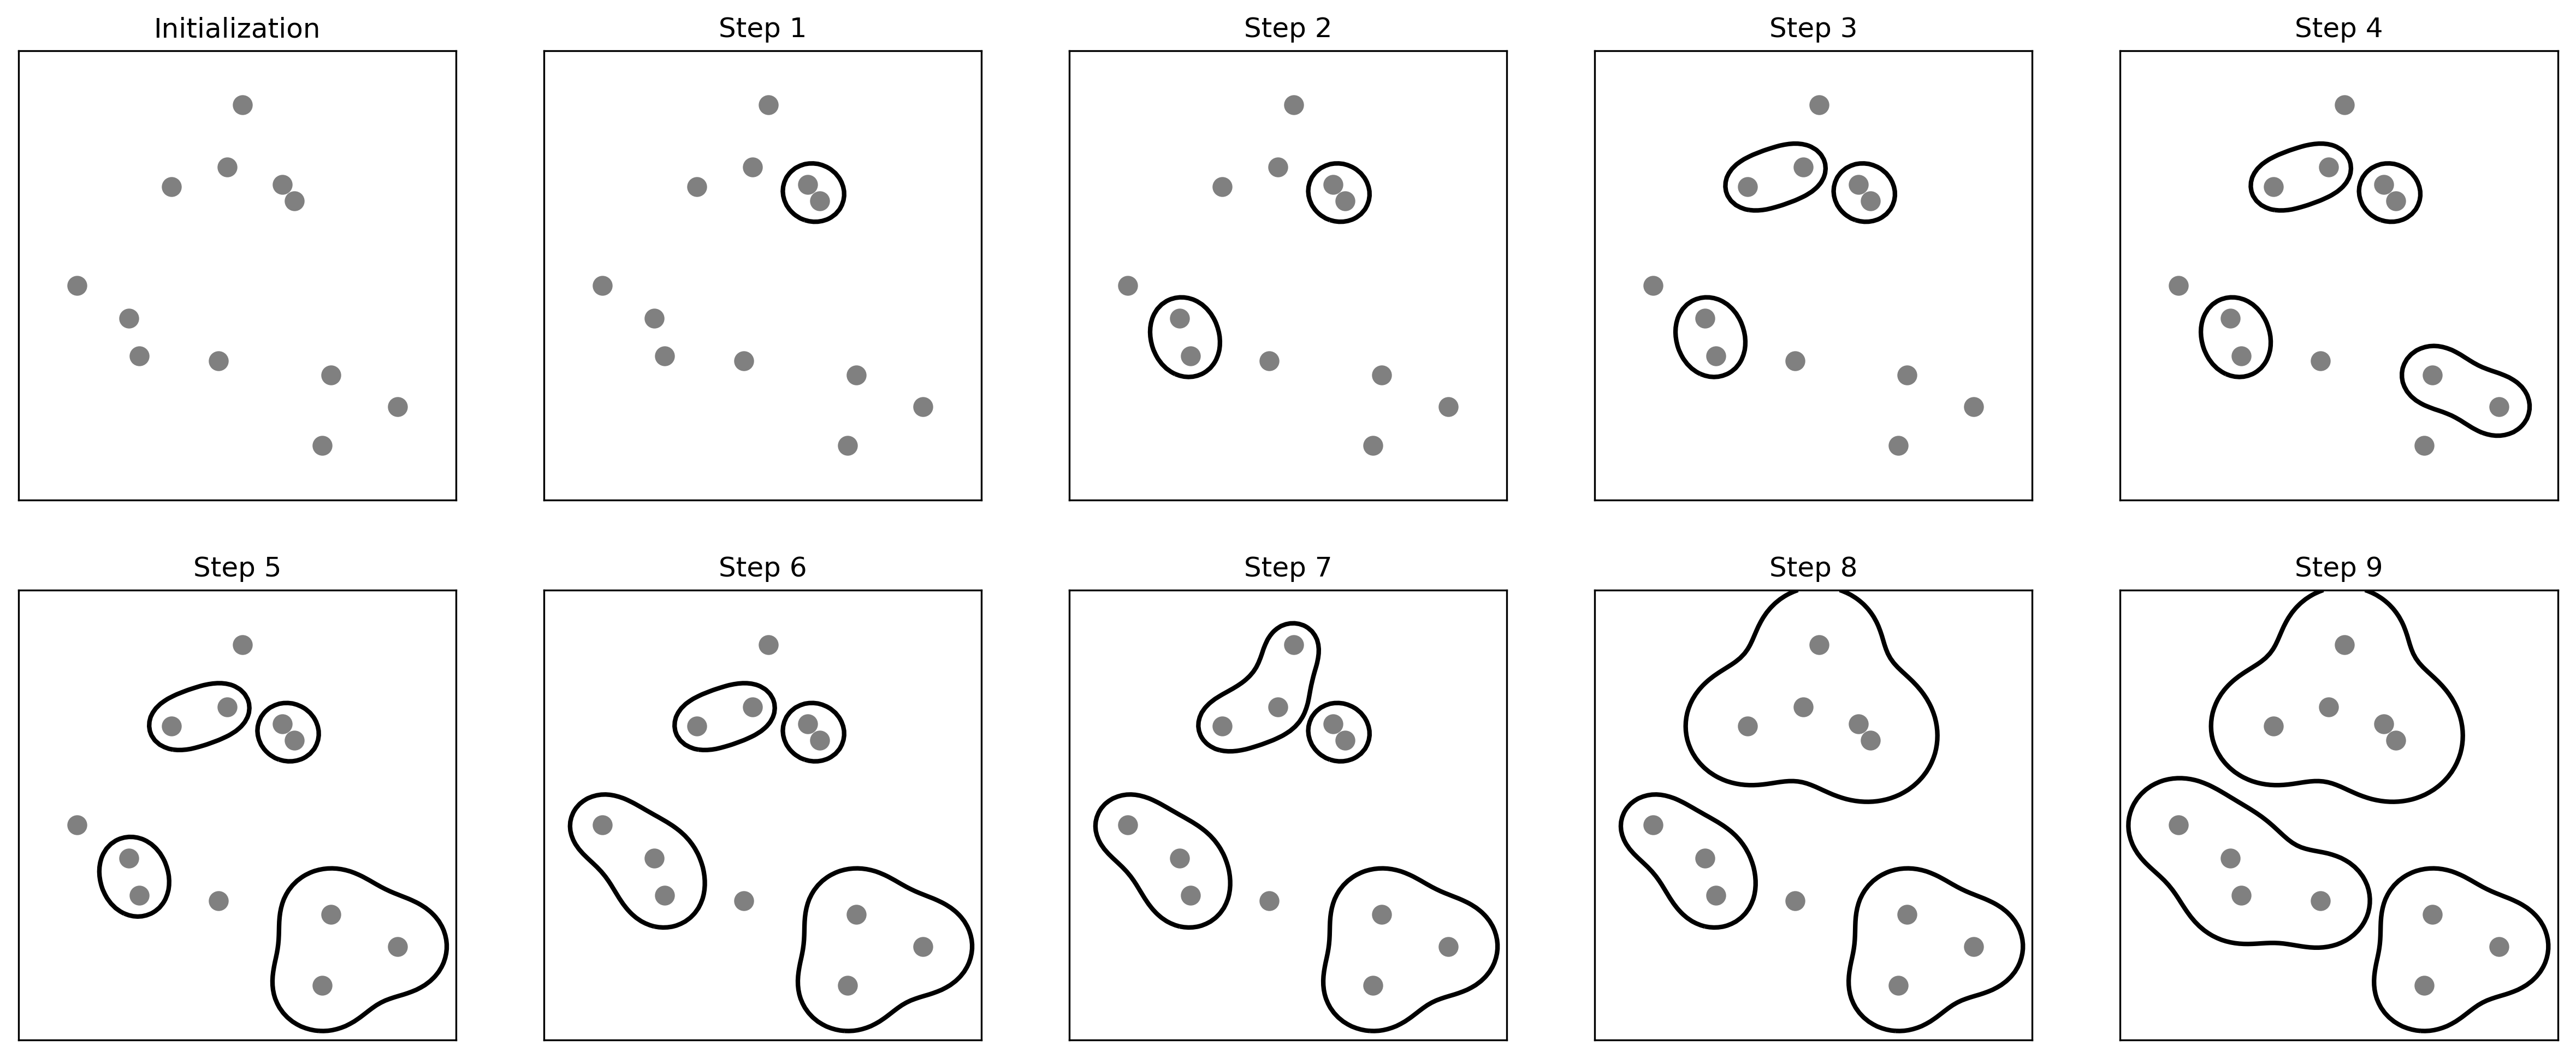

In [3]:
mglearn.plots.plot_agglomerative_algorithm()

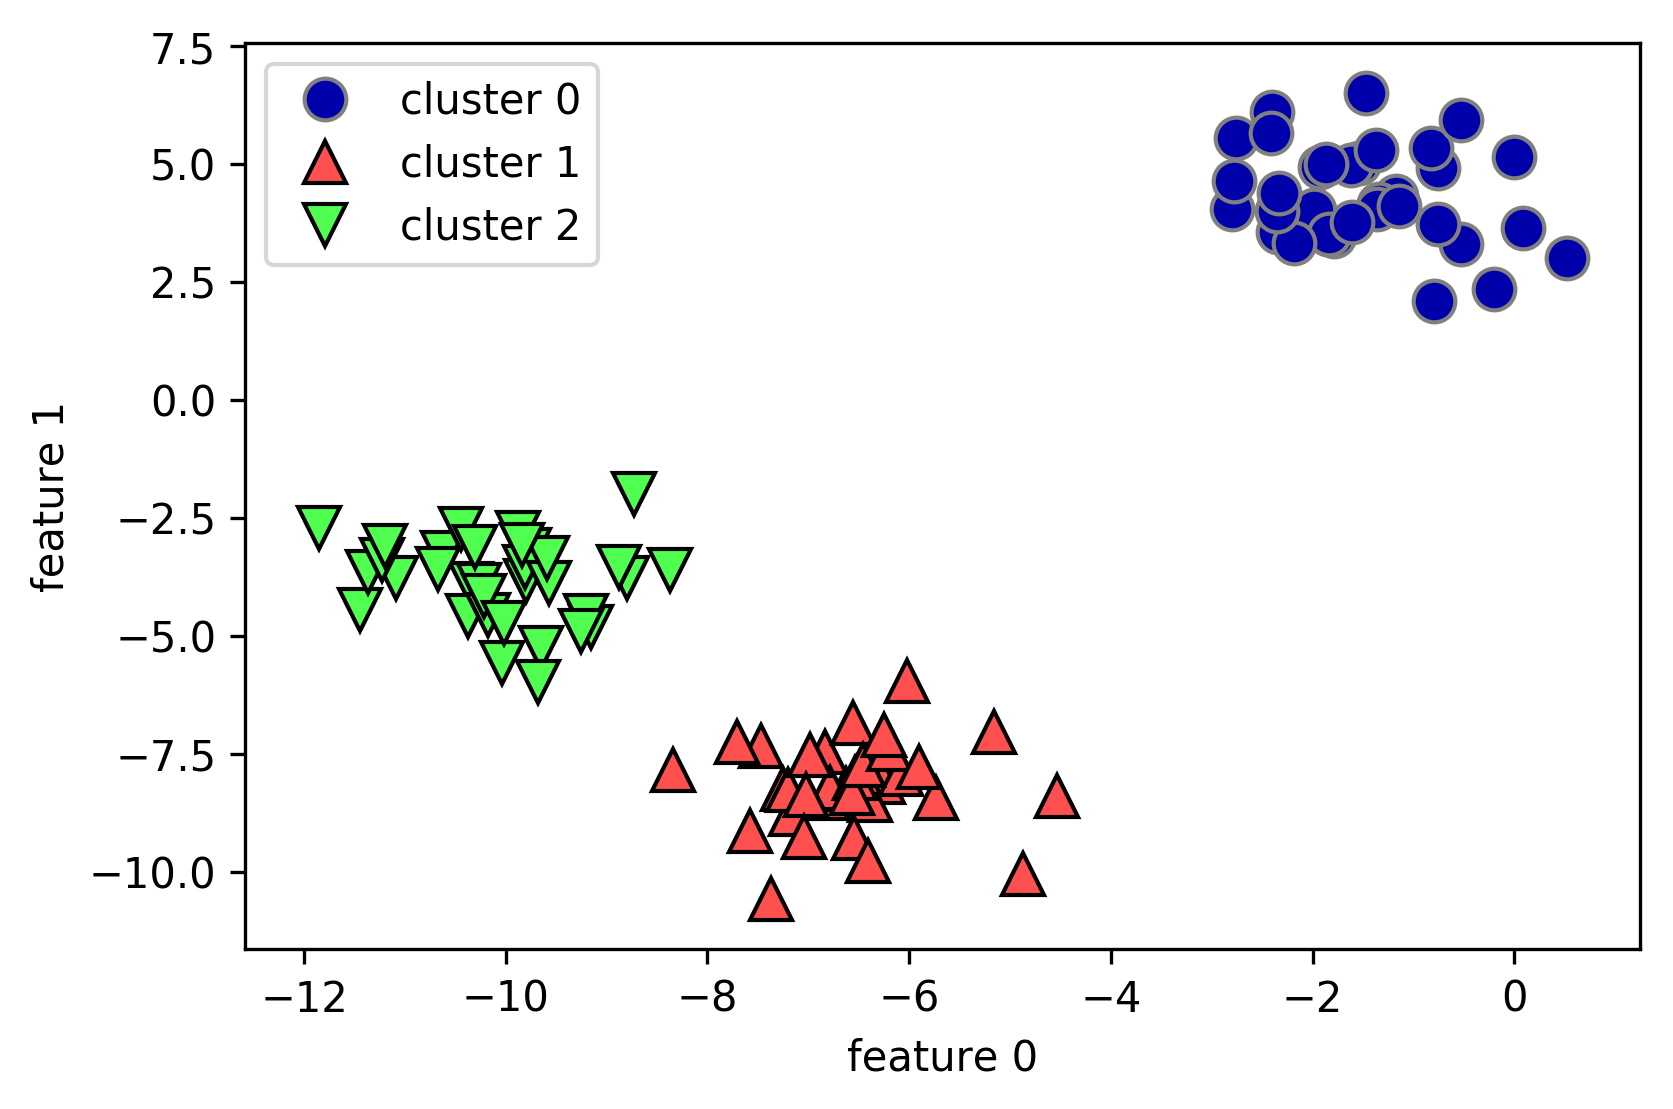

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc="best")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

### 계층적 군집과 덴드로그램
- 병합 군집은 계층적 군집을 만듭니다.
- 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동
- 각 중간 단계는 데이터에 대한 클러스터를 생성

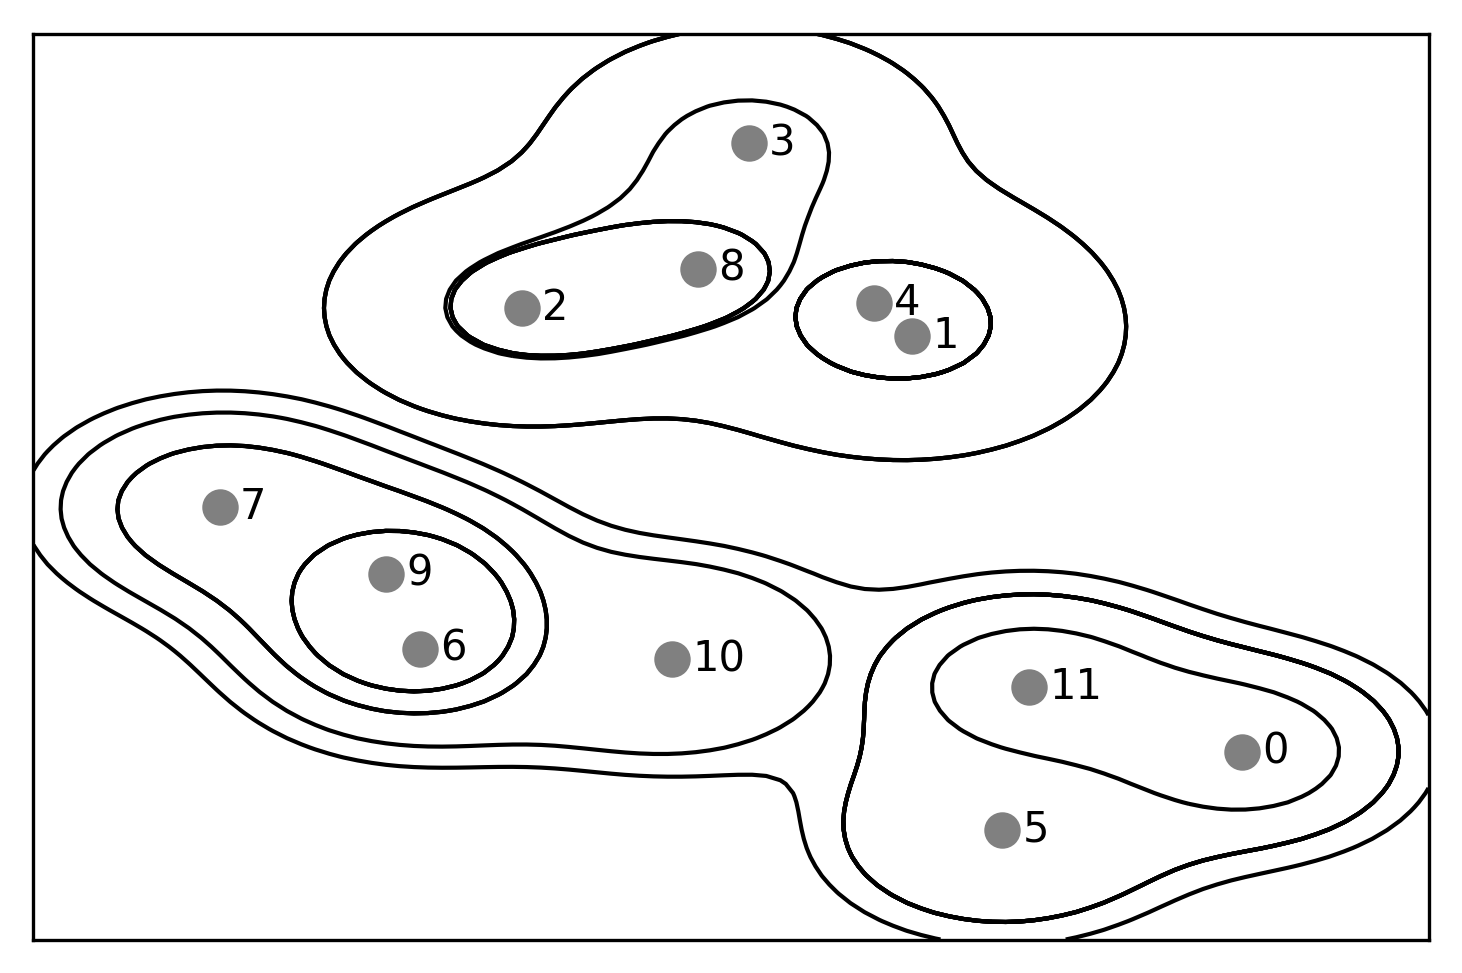

In [6]:
mglearn.plots.plot_agglomerative()

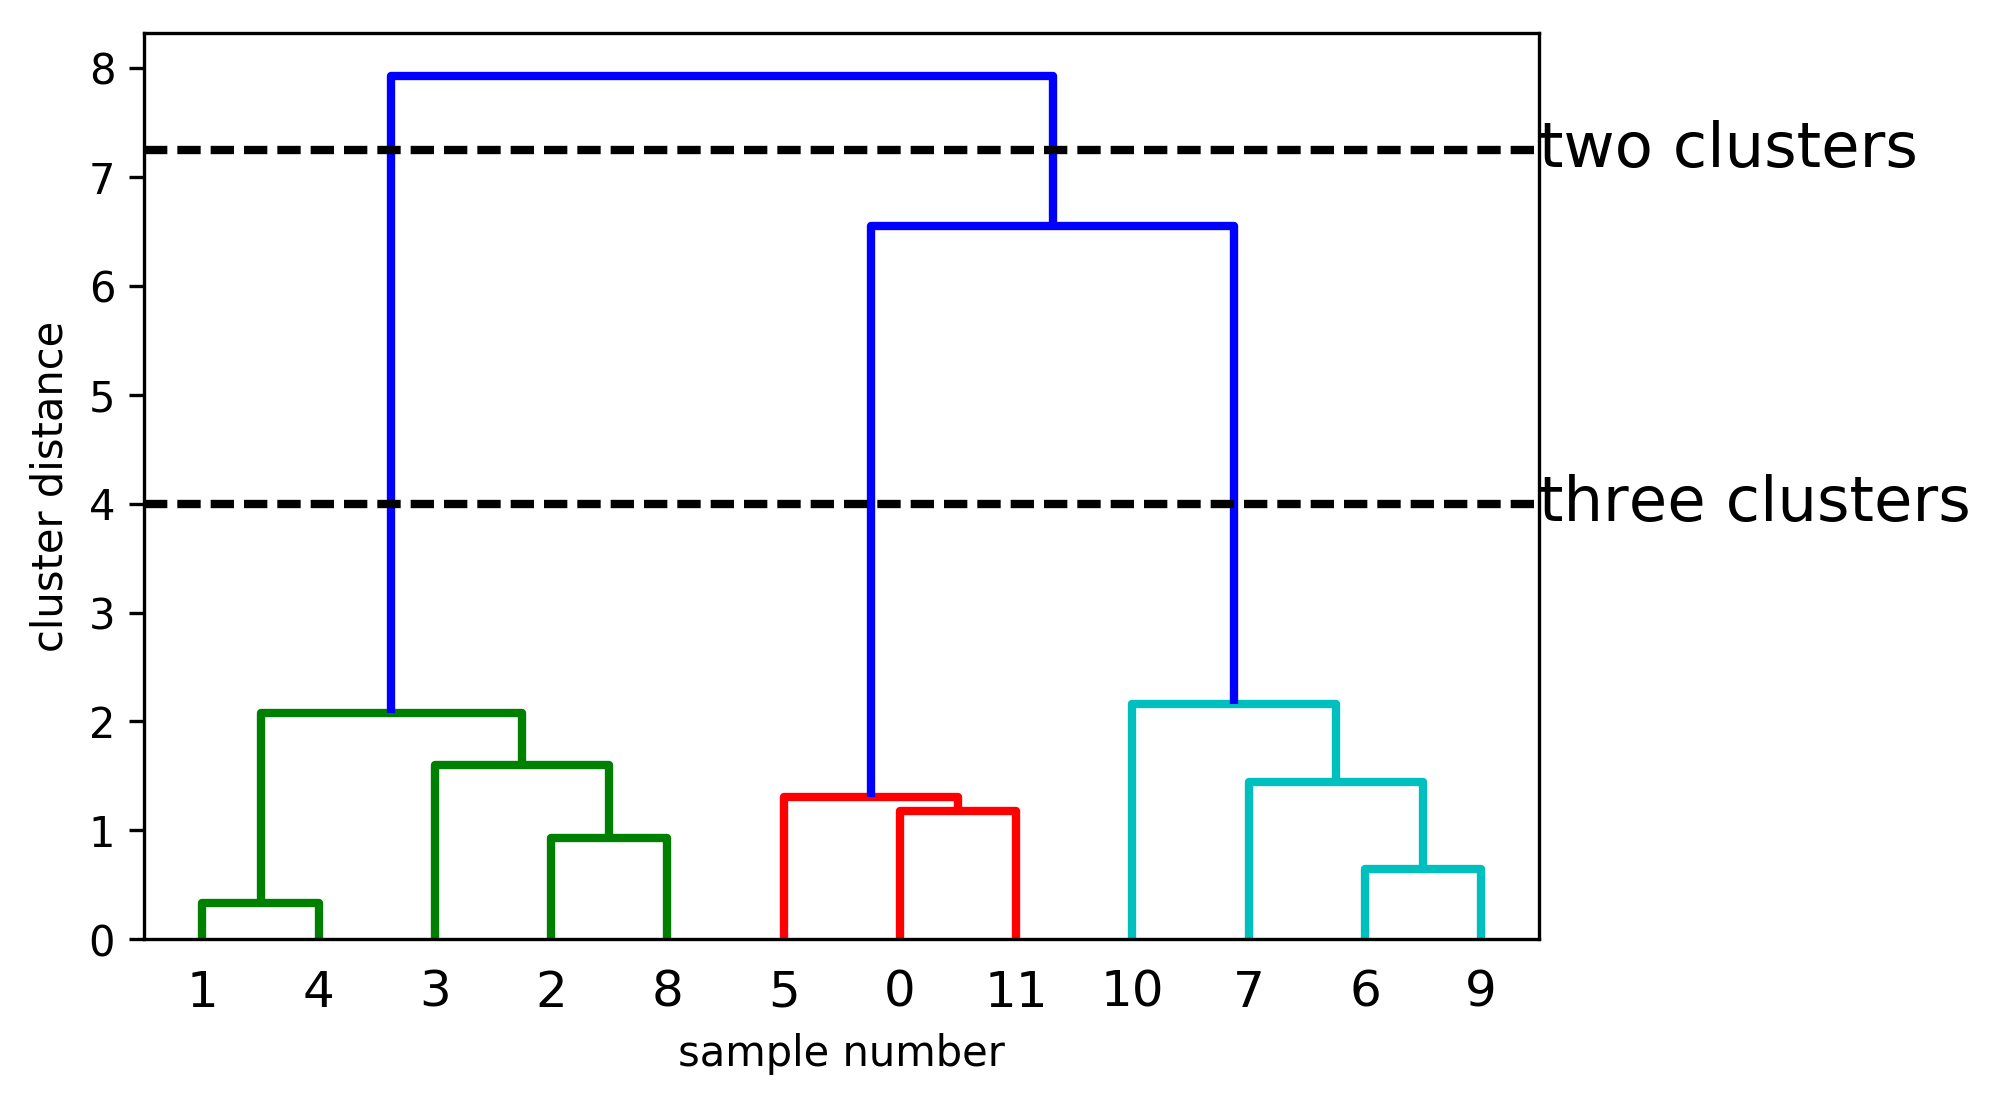

In [7]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size': 15})
plt.xlabel("sample number")
plt.ylabel("cluster distance")